In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('edlich-kmeans-A0.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(100, 3)


,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


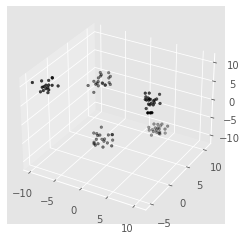

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
f3 = data['V3'].values
X = np.array(list(zip(f1, f2, f3)))
#plt.scatter(f1, f2, f3, c='black', s=7)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f1, f2, f3, c='black', s=7)

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Number of clusters
k = 5
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-5, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-5, size=k)
C_z = np.random.randint(0, np.max(X)-5, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[4. 3. 3.]
 [0. 0. 0.]
 [0. 2. 4.]
 [2. 3. 2.]
 [4. 3. 3.]]


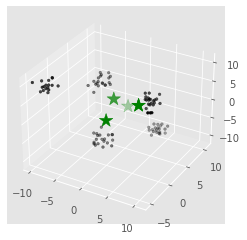

In [6]:
# Plotting along with the Centroids
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f1, f2, f3, c='#050505', s=7)
ax.scatter(C_x, C_y, C_z, marker='*', s=200, c='g')
plt.show()

In [15]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

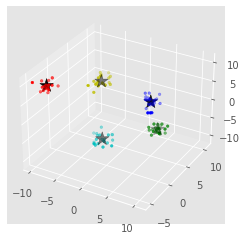

In [18]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

#ax.scatter(f1, f2, f3, c='#050505', s=7)


for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=7, c=colors[i])
        
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', s=200, c='#050505')

In [19]:
C

array([[-8.53242046, -3.55401526,  8.96857685],
       [ 3.66536804,  8.91074968, -9.06579829],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-5.10691526,  5.60179825,  3.71956936],
       [-2.40331671,  2.14752865, -8.02378894]])